In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np

from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
import csv
import pandas
from mpl_toolkits.mplot3d import Axes3D

,mon_last,freq,tot_vol,mon_first,donated
mon_last,1.000000,-0.182745,-0.182745,0.160618,-0.279869
freq,-0.182745,1.000000,1.000000,0.634940,0.218633
tot_vol,-0.182745,1.000000,1.000000,0.634940,0.218633
mon_first,0.160618,0.634940,0.634940,1.000000,-0.035854
donated,-0.279869,0.218633,0.218633,-0.035854,1.000000


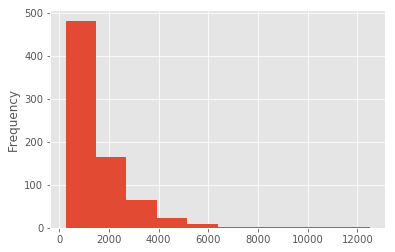

In [12]:
listdata=[]
with open("transfusion.data",'rb') as fdata:
    data = csv.reader(fdata, delimiter=',')

pd = pandas.read_csv("transfusion.data")
pd[:4]
pd.columns= ["mon_last","freq","tot_vol","mon_first","donated"]
label =pd.donated
pd_pos = pd[pd['donated']==1]
pd_neg = pd[pd['donated']==0]
#pd_pos = pd[pd[4]==1]
matplotlib.style.use('ggplot')
plt.figure();
%matplotlib inline

pd["tot_vol"].plot.hist()
pd.corr()


In [13]:

(pd["tot_vol"]*1.000/pd['freq']).unique()

array([ 250.])

In [14]:
pd_new = pd[["mon_first","mon_last","freq","donated"]]
labels = pd["donated"] 

In [15]:
train_data = pd_new[labels==1]
train_data = train_data[:100]
train_data_neg_temp = pd_new[labels==0]
train_data = train_data.append(train_data_neg_temp[:100],ignore_index=True)
train_data.describe()
np.random.seed(0) 
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
train_data = train_data.sample(frac =1)
#train_data.describe()

test_data =  pd_new[labels==1][100:200]
test_data = test_data.append(pd_new[labels==0][100:200])
test_data.describe()

,mon_first,mon_last,freq,donated
count,178.000000,178.000000,178.000000,178.000000
mean,34.730337,7.286517,6.612360,0.438202
std,24.513234,5.432892,6.789928,0.497566
min,2.000000,0.000000,1.000000,0.000000
25%,14.000000,4.000000,2.000000,0.000000
50%,32.000000,4.000000,5.000000,0.000000
75%,50.000000,11.000000,8.000000,1.000000
max,98.000000,26.000000,43.000000,1.000000


In [16]:
clg_lgr = LogisticRegression()

data = clg_lgr.fit_transform(train_data.ix[:,:3],train_data.ix[:,3])
score= clg_lgr.score(test_data.ix[:,:3],test_data.ix[:,3])
predict = clg_lgr.predict(test_data.ix[:,:3])
#np.sum(label_hat == test_data.ix[:,3])*1.00/178

In [17]:
train_data.ix[:,3].describe()

count    200.000000
mean       0.500000
std        0.501255
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: donated, dtype: float64

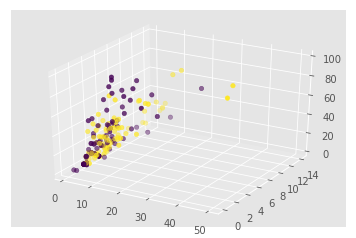

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax.scatter(pd["mon_last"],pd['freq'],pd['mon_first'], c= pd['donated'])
ax.scatter(train_data['freq'],train_data["mon_last"],train_data['mon_first'], c= train_data['donated'])